In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv("D:/Learning Stuff/python/data-sciense ---jose-portlieo/ML/lineary regrestion/Mumbai.csv")
df= df.iloc[:,0:4]
df.head()

Price  Area  Location  No. of Bedrooms
0  4850000   720  Kharghar                1
1  4500000   600  Kharghar                1
2  6700000   650  Kharghar                1
3  4500000   650  Kharghar                1
4  5000000   665  Kharghar                1

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7719 entries, 0 to 7718
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Price            7719 non-null   int64 
 1   Area             7719 non-null   int64 
 2   Location         7719 non-null   object
 3   No. of Bedrooms  7719 non-null   int64 
dtypes: int64(3), object(1)
memory usage: 241.3+ KB


In [4]:
df.describe()

Price         Area  No. of Bedrooms
count  7.719000e+03  7719.000000      7719.000000
mean   1.506165e+07   998.409250         1.913331
std    2.052100e+07   550.967809         0.855376
min    2.000000e+06   200.000000         1.000000
25%    5.300000e+06   650.000000         1.000000
50%    9.500000e+06   900.000000         2.000000
75%    1.700000e+07  1177.000000         2.000000
max    4.200000e+08  8511.000000         7.000000

In [5]:
df.columns

Index(['Price', 'Area', 'Location', 'No. of Bedrooms'], dtype='object')

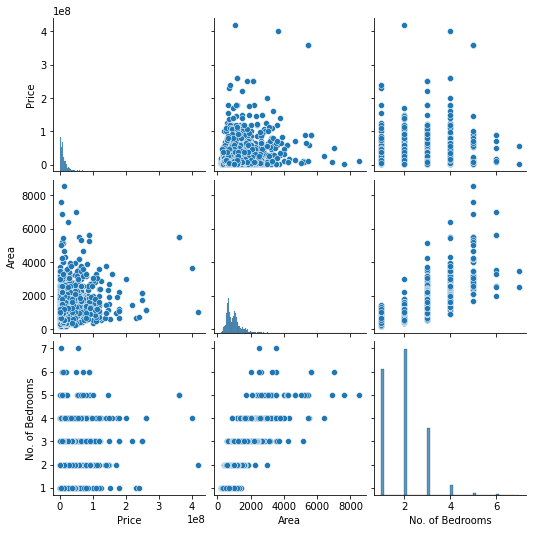

In [6]:
sns.pairplot(df)

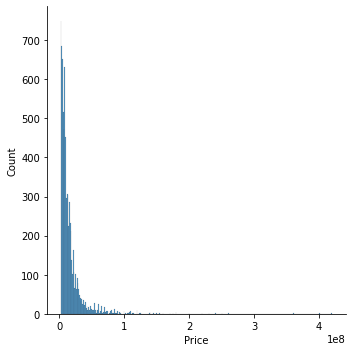

In [7]:
sns.displot(df['Price'])

<AxesSubplot:>

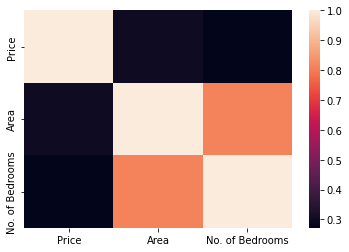

In [8]:
# df.corr()
sns.heatmap(df.corr())

In [9]:
x = df[['Area','No. of Bedrooms']]
x

Area  No. of Bedrooms
0      720                1
1      600                1
2      650                1
3      650                1
4      665                1
...    ...              ...
7714  1180                2
7715   530                1
7716   700                1
7717   995                2
7718  1020                2

[7719 rows x 2 columns]

In [10]:
y = df['Price'].values
y

array([4850000, 4500000, 6700000, ..., 4100000, 2750000, 2750000],
      dtype=int64)

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=0,test_size=0.3)
regression = LinearRegression()
regression.fit(x_train,y_train)

LinearRegression()

In [12]:
print(regression.intercept_)

2887443.8183760084


In [13]:
regression.coef_

array([   6396.61696527, 3075748.28477686])

In [14]:
cdf = pd.DataFrame(regression.coef_,x.columns,columns=['Coeff'])
cdf

Coeff
Area             6.396617e+03
No. of Bedrooms  3.075748e+06

preditction part-2

In [16]:
predition = regression.predict(x_test)
predition

array([ 9059154.71434332, 16171168.30420526,  9417365.26439842, ...,
        9673229.9430092 , 16395049.8979897 , 16395049.8979897 ])

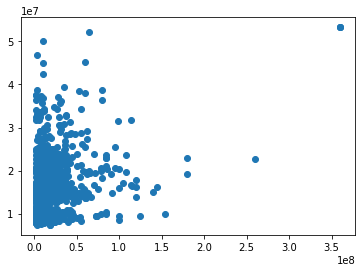

In [20]:
plt.scatter(y_test,predition)

C:\Users\zxc\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

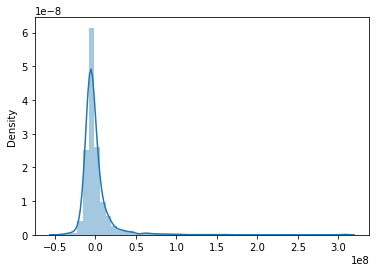

In [21]:
sns.distplot((y_test-predition))

In [24]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
ms = mean_squared_error(y_test,predition)
ms1 = mean_absolute_error(y_test,predition)
ms2 = r2_score(y_test,predition)
ms,ms1,ms2

(402767802406892.75, 10027899.276410691, 0.10100342748717706)

In [26]:
np.sqrt(ms)

20069075.773609824